In [17]:
from fastai.tabular import *
import pandas as pd
pd.set_option('display.max_columns', 100)
from sklearn import preprocessing

In [16]:
train = pd.read_csv('data/Melbourne_housing_FULL.csv')
train.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
train = train.fillna(0)

In [13]:
train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [19]:
train.shape

(34857, 21)

In [18]:
train['YearBuilt'].isna().sum()

19306

In [34]:
train['BuildingArea'].isna().sum()

0

In [20]:
train['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria', 'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [21]:
train['Propertycount'].unique()

array([4019., 3464., 3280., 2211., ..., 4939.,  604.,  121.,  342.])

In [26]:
dropp = ['Address','Postcode','Date','YearBuilt','Lattitude','Longtitude']

In [27]:
train = train.drop(dropp, axis=1)

In [33]:
train = train.replace(np.nan,0)

In [41]:
cat_names =  ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']
dep_var = 'Price'
    

In [38]:
procs = [FillMissing, Categorify, Normalize]


In [39]:
.3*train.shape[0]

10457.1

In [65]:
le = preprocessing.LabelEncoder()
for a in cat_names:
    train[a] = le.fit_transform(train[a].astype(str))

In [75]:
train=(train-train.mean())/train.std()

In [76]:
data = (TabularList.from_df(train, path='.', cat_names=cat_names, procs=procs)
                        .split_by_rand_pct()
                        .label_from_df(cols = dep_var, label_cls = FloatList, log=False)
                        .databunch())


In [77]:
data

TabularDataBunch;

Train: LabelList (27886 items)
x: TabularList
Suburb -1.790786763674556; Type -0.637812534680458; Method 1.6528765350578192; SellerG -1.1002548988174274; CouncilArea 1.7442109299657316; Regionname -0.8106440378600919; ,Suburb -1.790786763674556; Type -0.637812534680458; Method -0.35863853036163656; SellerG 0.7995169284969392; CouncilArea 1.7442109299657316; Regionname -0.8106440378600919; ,Suburb -1.790786763674556; Type -0.637812534680458; Method -0.35863853036163656; SellerG 0.7995169284969392; CouncilArea 1.7442109299657316; Regionname -0.8106440378600919; ,Suburb -1.790786763674556; Type 1.8087849695956202; Method 2.1557553014126833; SellerG 0.4273966736621664; CouncilArea 1.7442109299657316; Regionname -0.8106440378600919; ,Suburb -1.790786763674556; Type -0.637812534680458; Method 1.1499977687029552; SellerG 0.7995169284969392; CouncilArea 1.7442109299657316; Regionname -0.8106440378600919; 
y: FloatList
-1.1496468,0.9230533,0.2998428,-1.1496468,0.9020462
Path:

In [84]:
learn = None
gc.collect()

8679

In [117]:
learn = tabular_learner(data,layers=[1000,300,200], ps=[0.0001,0.001,0.01], emb_drop=0.04,metrics=rmse)

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


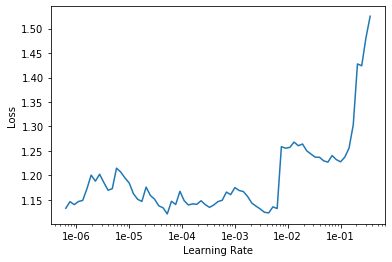

In [115]:
learn.lr_find()
learn.recorder.plot()

In [118]:
learn.fit_one_cycle(50,1e-05)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.242632,1.260310,1.107907,00:10
1,1.181995,1.160438,1.061604,00:10
2,1.040652,1.064198,1.014348,00:10
3,0.962333,0.991105,0.976931,00:11
4,0.930966,0.924072,0.941698,00:09
5,0.819493,0.869248,0.912177,00:10
6,0.846390,0.820777,0.885232,00:11
7,0.807670,0.789503,0.868424,00:09
8,0.774559,0.773923,0.858571,00:09
9,0.761066,0.762165,0.852032,00:11


Exception ignored in: <function _releaseLock at 0x7f76c48a0050>
Traceback (most recent call last):
  File "/home/subhaditya/anaconda3/lib/python3.7/logging/__init__.py", line 221, in _releaseLock
    def _releaseLock():
KeyboardInterrupt


RuntimeError: DataLoader worker (pid(s) 20805, 20806, 20819) exited unexpectedly

In [120]:
import lightgbm as lgb

In [123]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Price',axis=1), train['Price'], test_size = 0.25, random_state = 0)

In [127]:
d_train = lgb.Dataset(x_train, label=y_train)

In [129]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [144]:
clf = lgb.train(params, d_train, 100)

In [145]:
y_pred=clf.predict(x_test);y_pred

array([-0.048442, -0.034242,  0.002657, -0.120024, ...,  0.191004,  0.069027, -0.014557, -0.024756])

In [146]:
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


In [148]:
rmsle(y_test, y_pred)

/home/subhaditya/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


('RMSLE', 0.5451973246245021, False)